# ClubData
- Perform EDA
- Clean the data
- prepare the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('ClubData.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# df.colum
# notrequired = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM''CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
df = df.drop(columns = ['Unnamed: 0','Contract Valid Until','Joined','Nationality','Club','Loaned From','Name','Photo','Flag','Club Logo','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Value                     18207 non-null  object 
 5   Wage                      18207 non-null  object 
 6   Special                   18207 non-null  int64  
 7   Preferred Foot            18159 non-null  object 
 8   International Reputation  18159 non-null  float64
 9   Weak Foot                 18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Work Rate                 18159 non-null  object 
 12  Body Type                 18159 non-null  object 
 13  Real Face                 18159 non-null  object 
 14  Positi

In [6]:
column = ['Preferred Foot','Work Rate','Body Type','Real Face','Position']
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
df[column] = df[column].apply(le.fit_transform)

In [8]:
df[column]

,Preferred Foot,Work Rate,Body Type,Real Face,Position
0,0,8,4,1,21
1,1,1,1,1,26
2,1,2,5,1,14
3,1,8,3,1,5
4,1,0,6,1,19
...,...,...,...,...,...
18202,1,8,3,0,4
18203,1,8,6,0,26
18204,1,8,6,0,26
18205,1,8,3,0,24


In [9]:
def conver(data):
    if type(data) == str:
        data = data.replace('€','')
        if 'K'in data:
            data = data.replace('K','')
            data = float(data)*1000
        elif 'M'in data:
            data = data.replace('M','')
            data = float(data)*1000000
        
    return data
# conver('€226.5M')
df['Release Clause'] = df['Release Clause'].apply(conver)

In [10]:
df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [11]:
def removelbs(data):
    if type(data) == str:
        return data.replace('lbs',' ')
    return float(data)
df['Weight'] = df['Weight'].apply(removelbs)

In [12]:
df['Weight']

0        159 
1        183 
2        150 
3        168 
4        154 
         ... 
18202    134 
18203    170 
18204    148 
18205    154 
18206    176 
Name: Weight, Length: 18207, dtype: object

In [13]:
def removecolon(data):
    if type(data) == str:
        return data.replace("'",'.')
    return float(data)
df['Height'] = df['Height'].apply(removecolon)

In [14]:
df['Height']

0         5.7
1         6.2
2         5.9
3         6.4
4        5.11
         ... 
18202     5.9
18203     6.3
18204     5.8
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: object

In [15]:
for i in df.columns:
    if df[i].dtype == 'object':
       print(i,df[i]) 
drop = []

Value 0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object
Wage 0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object
Height 0         5.7
1         6.2
2         5.9
3         6.4
4        5.11
         ... 
18202     5.9
18203     6.3
18204     5.8
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: object
Weight 0        159 
1        183 
2        150 
3        168 
4        154 
         ... 
18202    134 
18203    170 
18204    148 
18205    154 
18206    176 
Name: Weight, Length: 18207, dtype: object


In [16]:
df['Wage'] = df['Wage'].apply(conver)
df['Value'] = df['Value'].apply(conver)

In [17]:
df['Value']=df['Value'].astype('int64')
df['Wage'] = df['Wage'].astype('int64')
df['Height'] = df['Height'].astype('float64')
df['Weight'] = df['Weight'].astype('float64')




In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Value                     18207 non-null  int64  
 5   Wage                      18207 non-null  int64  
 6   Special                   18207 non-null  int64  
 7   Preferred Foot            18207 non-null  int32  
 8   International Reputation  18159 non-null  float64
 9   Weak Foot                 18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Work Rate                 18207 non-null  int32  
 12  Body Type                 18207 non-null  int32  
 13  Real Face                 18207 non-null  int32  
 14  Positi

In [19]:
df.head()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,110500000,565000,2202,0,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,33,94,94,77000000,405000,2228,1,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,26,92,93,118500000,290000,2143,1,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,27,91,93,72000000,260000,1471,1,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,27,91,92,102000000,355000,2281,1,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [20]:
df.isna().sum()

ID                             0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                      0
Body Type                      0
Real Face                      0
Position                       0
Jersey Number                 60
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpeed                   48
Agility   

In [21]:
for columns in df.columns:
    if df[columns].isna().sum() > 0:
        df[columns] = df[columns].fillna(df[columns].mean())

In [22]:
df.isna().sum()

ID                          0
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower 

In [23]:
x = df


# KMeans Clustering

In [24]:
# Kmeans
from sklearn.cluster import KMeans
k = [1,2,3,4,5,6,7,8,9,10]
ssd = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_)

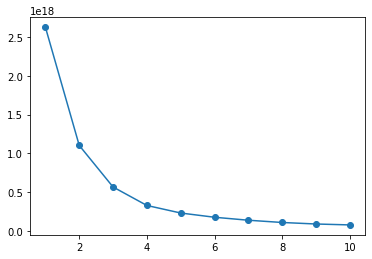

In [25]:
plt.plot(k,ssd,marker = 'o')

In [26]:
# k = 5
model = KMeans(n_clusters=5)
model.fit(x)
print(model.inertia_)
print(model.labels_)
print(model.cluster_centers_.shape[0])


2.3085630342361728e+17
[1 1 1 ... 2 2 2]
5


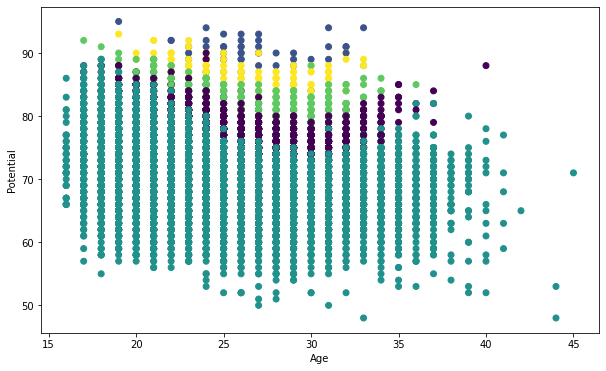

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x['Age'],x['Potential'],c = model.labels_)
plt.xlabel('Age')
plt.ylabel('Potential')
centroid = model.cluster_centers_
# print(centroid[0][0])
c = ['r','g','b','c','n']
# for i in range(centroid.shape[0]):
#     plt.scatter(centroid[i][0],centroid[i][1],label = str(i)+' centroid')
# plt.legend()

### Cluster Visualization

In [28]:
x =x[['Age','Potential']]
model = KMeans(n_clusters=5)
model.fit(x)
print(model.labels_)

[4 4 4 ... 2 2 2]


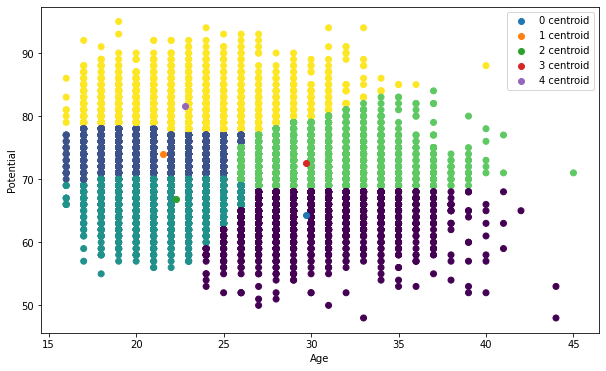

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x['Age'],x['Potential'],c = model.labels_)
plt.xlabel('Age')
plt.ylabel('Potential')
centroid = model.cluster_centers_
# print(centroid[0][0])
c = ['r','g','b','c','n']
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1],label = str(i)+' centroid')
plt.legend()

# DBSCAN Clustering

In [30]:
x = df
x

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,110500000,565000,2202,0,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,33,94,94,77000000,405000,2228,1,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,26,92,93,118500000,290000,2143,1,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,27,91,93,72000000,260000,1471,1,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,27,91,92,102000000,355000,2281,1,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,60000,1000,1307,1,1.0,2.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,19,47,63,60000,1000,1098,1,1.0,2.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,16,47,67,60000,1000,1189,1,1.0,3.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,17,47,66,60000,1000,1228,1,1.0,3.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [32]:
from sklearn.neighbors import NearestNeighbors


In [33]:
n = NearestNeighbors(n_neighbors=2)
n_fit = n.fit(x)
distance,_ = n_fit.kneighbors(x)


In [34]:

distance=np.sort(distance,axis = 0)
distance = distance[:,1]
distance

array([1.20830460e+01, 1.20830460e+01, 3.41174442e+01, ...,
       1.25002346e+07, 1.34186419e+07, 2.59131302e+07])

Text(0.5, 0, 'Distance')

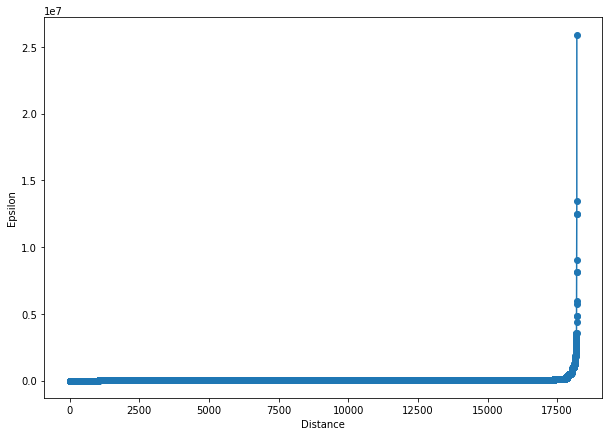

In [35]:
plt.figure(figsize=(10,7))
plt.plot(distance,marker = 'o')
plt.ylabel('Epsilon')
plt.xlabel('Distance')

In [36]:
# epsilon = 0.3,min_sample = 53 + 1 --> dimension + 1 = 54

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
model = DBSCAN(eps = 0.3,min_samples=54)
model.fit(x)
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

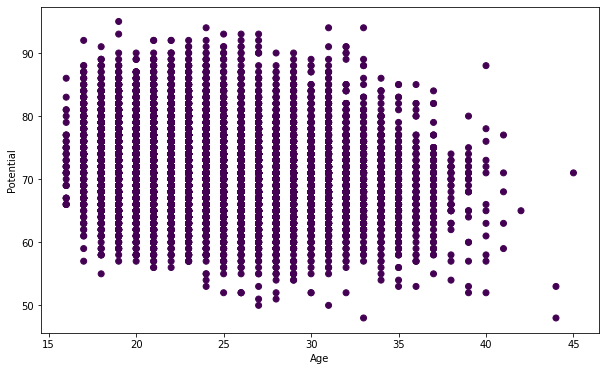

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(x['Age'],x['Potential'],c = model.labels_)
plt.xlabel('Age')
plt.ylabel('Potential')
# centroid = model.cluster_centers_
# print(centroid[0][0])
c = ['r','g','b','c','n']

In [42]:
x = x[['Age','Potential']]

In [43]:
x

,Age,Potential
0,31,94
1,33,94
2,26,93
3,27,93
4,27,92
...,...,...
18202,19,65
18203,19,63
18204,16,67
18205,17,66


In [44]:
n = NearestNeighbors(n_neighbors=2)
n_fit = n.fit(x)
distance,_=n_fit.kneighbors(x)


Text(0.5, 0, 'Distance')

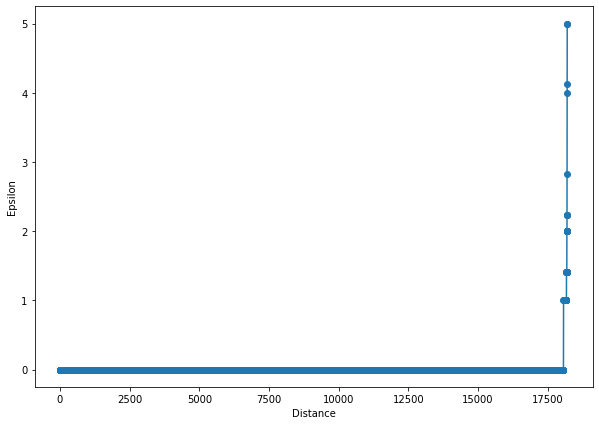

In [45]:

distance=np.sort(distance,axis = 0)
distance = distance[:,1]
distance
plt.figure(figsize=(10,7))
plt.plot(distance,marker = 'o')
plt.ylabel('Epsilon')
plt.xlabel('Distance')


In [47]:
model = DBSCAN(eps = 0.3,min_samples=54)
model.fit(x)
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

Text(0, 0.5, 'Potential')

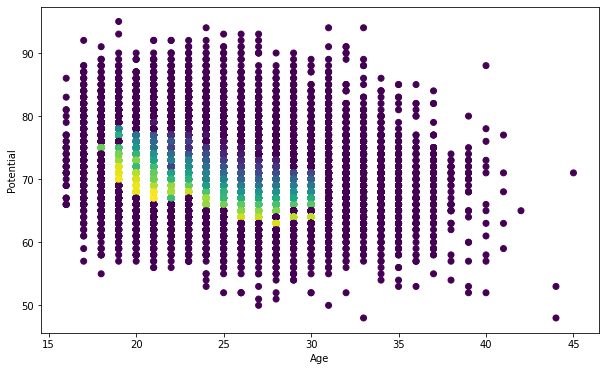

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(x['Age'],x['Potential'],c = model.labels_)
plt.xlabel('Age')
plt.ylabel('Potential')
# centroid = model.cluster_centers_
# print(centroid[0][0])
# c = ['r','g','b','c','n']